# Convolution

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from easydynamics.convolution import Convolution
from easydynamics.sample_model import DampedHarmonicOscillator
from easydynamics.sample_model import DeltaFunction
from easydynamics.sample_model import Gaussian
from easydynamics.sample_model import Lorentzian
from easydynamics.sample_model.component_collection import ComponentCollection
from easydynamics.utils import _detailed_balance_factor as detailed_balance_factor

%matplotlib widget

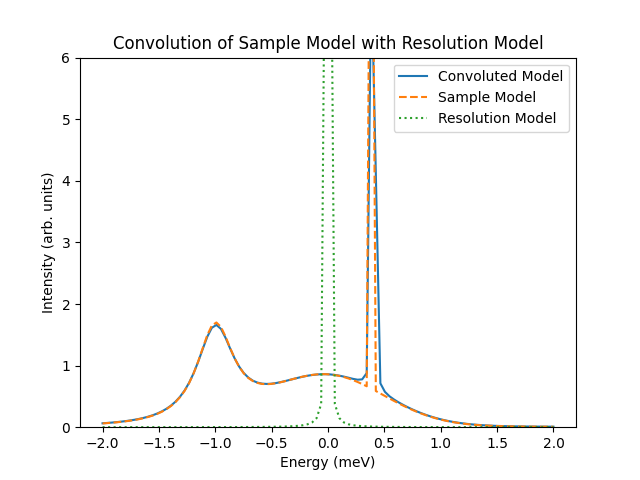

In [2]:
# Standard example of convolution of a sample model with a
# resolution model
sample_components = ComponentCollection()
gaussian = Gaussian(display_name='Gaussian', width=0.5, area=1)
dho = DampedHarmonicOscillator(display_name='DHO', center=1.0, width=0.3, area=2.0)
lorentzian = Lorentzian(display_name='Lorentzian', center=-1.0, width=0.2, area=1.0)
delta = DeltaFunction(display_name='Delta', center=0.4, area=0.5)
sample_components.append_component(gaussian)
# sample_components.append_component(dho)
sample_components.append_component(lorentzian)
sample_components.append_component(delta)

resolution_components = ComponentCollection()
resolution_gaussian = Gaussian(display_name='Resolution Gaussian', width=0.015, area=0.8)
resolution_lorentzian = Lorentzian(display_name='Resolution Lorentzian', width=0.025, area=0.2)
resolution_components.append_component(resolution_gaussian)
resolution_components.append_component(resolution_lorentzian)

energy = np.linspace(-2, 2, 100)

convolver = Convolution(
    sample_components=sample_components, resolution_components=resolution_components, energy=energy
)
y = convolver.convolution()
plt.figure()
plt.plot(energy, y, label='Convoluted Model')
plt.xlabel('Energy (meV)')
plt.ylabel('Intensity (arb. units)')
plt.title('Convolution of Sample Model with Resolution Model')

plt.plot(energy, sample_components.evaluate(energy), label='Sample Model', linestyle='--')
plt.plot(energy, resolution_components.evaluate(energy), label='Resolution Model', linestyle=':')

plt.legend()
# set the limit on the y axis
plt.ylim(0, 6)
plt.show()

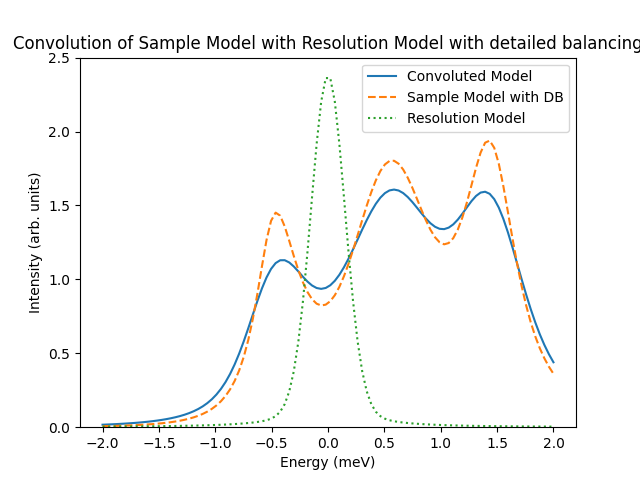

In [3]:
# Use some of the extra settings for the numerical convolution
sample_components = ComponentCollection()
gaussian = Gaussian(display_name='Gaussian', width=0.3, area=1)
dho = DampedHarmonicOscillator(display_name='DHO', center=1.0, width=0.3, area=2.0)
lorentzian = Lorentzian(display_name='Lorentzian', center=-1.0, width=0.2, area=1.0)
delta = DeltaFunction(display_name='Delta', center=0.4, area=0.5)
sample_components.append_component(gaussian)
sample_components.append_component(dho)
sample_components.append_component(lorentzian)

resolution_components = ComponentCollection()
resolution_gaussian = Gaussian(display_name='Resolution Gaussian', width=0.15, area=0.8)
resolution_lorentzian = Lorentzian(display_name='Resolution Lorentzian', width=0.25, area=0.2)
resolution_components.append_component(resolution_gaussian)
resolution_components.append_component(resolution_lorentzian)

energy = np.linspace(-2, 2, 100)


temperature = 10.0  # Temperature in Kelvin
offset = 0.5
upsample_factor = 5
extension_factor = 0.5
plt.figure()
plt.xlabel('Energy (meV)')
plt.ylabel('Intensity (arb. units)')

convolver = Convolution(
    sample_components=sample_components,
    resolution_components=resolution_components,
    energy=energy - offset,
    upsample_factor=upsample_factor,
    extension_factor=extension_factor,
    temperature=temperature,
    normalize_detailed_balance=True,
)
y = convolver.convolution()


plt.plot(energy, y, label='Convoluted Model')

plt.plot(
    energy,
    sample_components.evaluate(energy - offset)
    * detailed_balance_factor(energy - offset, temperature),
    label='Sample Model with DB',
    linestyle='--',
)

plt.plot(energy, resolution_components.evaluate(energy), label='Resolution Model', linestyle=':')
plt.title('Convolution of Sample Model with Resolution Model with detailed balancing')

plt.legend()
plt.ylim(0, 2.5)
plt.show()